In [1]:
using PyPlot

INFO: Loading help data...


## A single equality constraint 

Consider the problem of minimizing a linear function on a circle

\begin{equation*}
		\min x_1 + x_2 \quad \text{ subject to } \quad x_1^2 + x_2^2 - 2 = 0.
\end{equation*}
    
We have $f(x) = x_1 + x_2$, $\mathcal{I}=\emptyset, \mathcal{E}=\{1\}$ and $c_1 = x_1^2 + x_2^2 - 2$.
	
The feasible set $\Omega$ it the circle around the origin of radius $\sqrt{2}$ (not its interior). Note that $\Omega$ is not convex and so we will call this a non-convex problem.

By consulting the Figure below, we see that the global solution is $x^*=(-1,-1)^\top$. 
From any other point on the circle, there is a way to move that stays feasible and decreases $f$. 
	


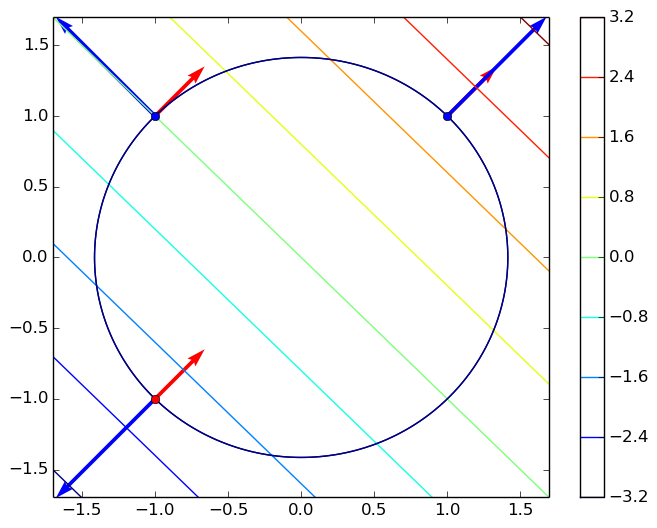

In [23]:
x = linspace(-1.2*sqrt(2),1.2*sqrt(2),101);
f(x) = x[1]+x[2]
df(x) = [1.;1;]
c(x) = x[1].^2 + x[2].^2 - 2
dc(x) = 2*x
fx = float([f([x[k];x[i];]) for k=1:length(x), i=1:length(x)])
cx = float([c([x[k];x[i];]) for k=1:length(x), i=1:length(x)])

contour(x,x,fx',10,hold=true)
colorbar()
contour(x,x,cx',[0.0,0.0])
xs = [-1;-1.;]
plot(xs[1],xs[2],"or")
df1 = df(xs)
dc1 = dc(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=10)
quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=10)


xs = [-1;1;]
plot(xs[1],xs[2],"ob")
df1 = df(xs)
dc1 = dc(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=10)
quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=10)

xs = [1;1;]
plot(xs[1],xs[2],"ob")
df1 = df(xs)
dc1 = dc(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=10)
quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=10);



The circle defines the feasible set and the contour lines are parallels. At the solution $x^*=(-1,-1)^T$ (see red point) the gradients of the objective function (red arrow) and the constraint (blue arrow) are aligned. At a non-optimal point $x=(-1,1)^T$ the gradients of $f$ and $c$ are not aligned. However, the gradients also align at the global maximum $x=(1,1)^T$ and so we should be suspicous that alignment of gradients is *necessary* but not *sufficient*.

We could argue that for the minimizer, both gradients point in opposite directions and at the maximizer both gradients point into the same direction. However, replacing $c_1$ b $-c_1$ will not change the problem, but will change the gradients. 

Note, that unlike in the unconstrained case $x^*$ is the global minimizer, but does not fulfill $\nabla f(x^*) = 0$.


## A single inequality constraint

We now include the interior of the circle into the feasible set

\begin{equation*}
    \min x_1 + x_2 \quad \text{ subject to } \quad x_1^2 + x_2^2 - 2  \leq 0.
\end{equation*}

We have $f(x) = x_1 + x_2$, $\mathcal{I}=\{1\}, \mathcal{E}=\emptyset$ 
    and $c_1(x) = x_1^2 + x_2^2 - 2$.
	
The feasible set it the circle around the origin of radius $\sqrt{2}$ and its interior. Thus, this problem is convex.

Of course, the solution still is $x^*=(-1,-1)^\top$. 
        

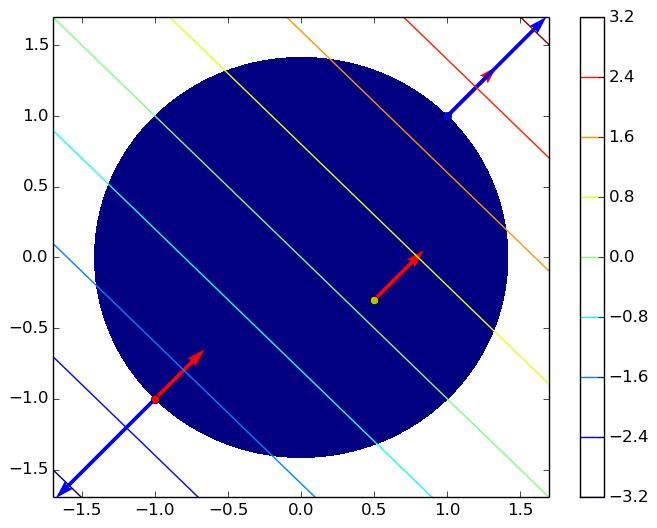

PyObject <matplotlib.quiver.Quiver object at 0x7f3f7b4ee490>

In [24]:
# Let us plot the objective function and feasible set
contour(x,x,fx',10,hold=true)
colorbar()
contourf(x,x,cx',[0.0,0.0])
xs = [-1;-1.;]
plot(xs[1],xs[2],"or")
df1 = df(xs)
dc1 = dc(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=10)
quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=10)

xs = [.5;-0.3;]
plot(xs[1],xs[2],"oy")
df1 = df(xs)
# dc1 = dc(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=10)
# quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=10)


xs = [1;1;]
plot(xs[1],xs[2],"ob")
df1 = df(xs)
dc1 = dc(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=10)
quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=10)


Figure for the inequality constraint problem. Gradients of $f$ (red arrow) and $c_1$ (blue arrow) are plotted at three different points. At the global solution $x^*$ both gradients point exactly in opposite directions, at the global maximum both arrows point into the same direction. We also see an interior point (yellow dot), at which we can, for instance, find feasible points with lower function value by applying a Gradient Descent step.

Note: Unlike before, the sign of $c_1$ now cannot be changed without changing the problem (rendering it non-convex)

## Two inequality constraints

We now add one more inequality constraint to the problem. 

\begin{equation*}
    \min x_1 + x_2 \quad \text{ subject to } \quad x_1^2 + x_2^2 - 2  \leq 0, - x_2 \leq 0.
\end{equation*}

We have $f(x) = x_1 + x_2$, $\mathcal{I}=\{1,2\}, \mathcal{E}=\emptyset$ 
    and $c_1(x) = x_1^2 + x_2^2 - 2$, $c_2(x) =-x_2$.
	
The feasible set is a half-disk around the origin of radius $\sqrt{2}$ with the bottom half cut off. Thus, this problem is convex.

Of course, the solution still is $x^*=(-\sqrt{2},0)^\top$. 


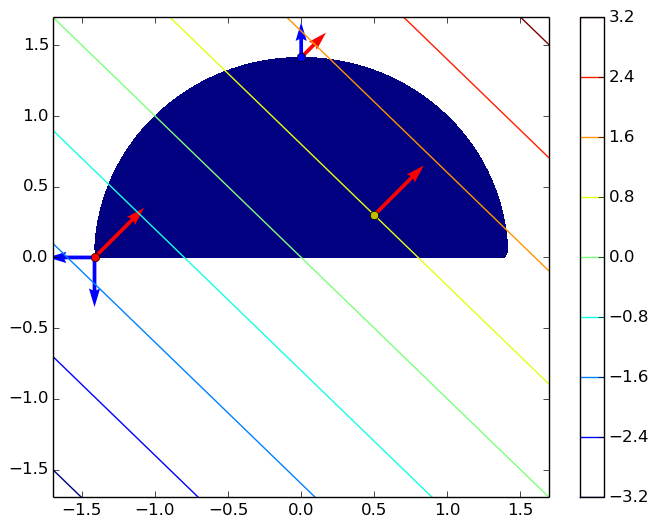

PyObject <matplotlib.quiver.Quiver object at 0x7f3f7ae35510>

In [41]:
c1(x) = x[1].^2 + x[2].^2 - 2
dc1f(x) = 2*x
c2(x) = -x[2]
dc2f(x) = -[0;1;]

cx1 = float([c1([x[k];x[i];]) for k=1:length(x), i=1:length(x)])
cx2 = float([c2([x[k];x[i];]) for k=1:length(x), i=1:length(x)])
cxm = max(cx1,cx2)

# Let us plot the objective function and feasible set
contour(x,x,fx',10,hold=true)
colorbar()

contourf(x,x,cxm',[0.0,0.0])

xs = [-sqrt(2);0;]
plot(xs[1],xs[2],"or")
df1 = df(xs)
dc1 = dc1f(xs)
dc2 = dc2f(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=10)
quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=30)
quiver(xs[1],xs[2],dc2[1],dc2[2],color="b",scale=10)

xs = [.5;0.3;]
plot(xs[1],xs[2],"oy")
df1 = df(xs)
# dc1 = dc(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=10)
# quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=10)

xs = [0;sqrt(2);]
plot(xs[1],xs[2],"ob")
df1 = df(xs)
dc1 = dc1f(xs)
quiver(xs[1],xs[2],df1[1],df1[2],color="r",scale=20)
quiver(xs[1],xs[2],dc1[1],dc1[2],color="b",scale=40)
# axis([minimum(x),maximum(x), -0.5, 1.6])


The above plot shows a two-dimensional problem with two inequality constraints. Here we look at three interesting points. At the point $(0,\sqrt{2})^T$ (blue) the new constraint does not play a role, we say it is *inactive*. The first constraint though is *active*. At the yello point, no constraint is active and we can find a feasible descent direction. Finally, at the solution, both constraints are active. We see that this time, the gradients of $c_1, c_2$ and the gradient of the objective $\nabla f$ are not aligned. However we see that:

In [43]:
xs = [-sqrt(2);0;]
df1 = df(xs)
dc1 = dc1f(xs)
dc2 = dc2f(xs)

lam = [dc1 dc2]\df1

@printf(" |df1 - %1.3f dc1 + %1.3f dc2| = %1.2e\n" lam[1] lam[2] norm([dc1 dc2]*lam -df1)

LoadError: syntax: missing comma or ) in argument list
while loading In[43], in expression starting on line 8

## Summary

These two simple examples show some of the challenges we will face when deriving optimility conditions (and ultimately alrogithms) for solving constrained optimization problems. We have seen that
1. Solutions $x^*$ will in general not satisfy $\nabla f(x^*)=0$. 
1. The relationship of $\nabla f(x^*)$ and $\nabla c_1(x^*)$ seems to be interesting. We will formalize this in the celebrated [Karush-Kuhn-Tucker (KKT)](http://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions) conditions. 
1. Equality and inequality constraints are conceptually very different from one another (the sign of $c_1$ *does* matter for inequalities).